In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pickle
import os
import sys
import time
from matplotlib import colors
import matplotlib.gridspec as gridspec
from mpl_toolkits.axes_grid1.inset_locator import inset_axes
from matplotlib.colors import LogNorm
from matplotlib import cm, ticker
from matplotlib.colors import LinearSegmentedColormap
from scipy.interpolate import interpn

if 'path' in locals(): os.chdir(path)
else: os.chdir("../"); path = os.getcwd()
print("The path is:", path)
path_manustript = path + "/Manuscript_Results/"
from pyMFI import MFI
from pyMFI import MFI1D
from pyMFI import run_plumed

from matplotlib import rc
plt.rcParams.update({ "text.usetex": True, "font.family": "serif", "font.serif": ["computer modern roman"], "font.size": 22})
boldfont = {'fontname':'Helvetica', 'fontweight':'bold'}

plw = 0.6
pcs = 3
pms = 3
bfillc = [0.9,0.9,0.9]
plt.rcParams['axes.linewidth'] = plw
plt.rcParams['xtick.top'] = True
plt.rcParams['xtick.direction'] = 'in'
plt.rcParams['xtick.major.width'] = plw
plt.rcParams['xtick.minor.width'] = plw
plt.rcParams['xtick.minor.visible'] = True
plt.rcParams['xtick.major.size'] = 4.5
plt.rcParams['ytick.right'] = True
plt.rcParams['ytick.direction'] = 'in'
plt.rcParams['ytick.major.width'] = plw
plt.rcParams['ytick.minor.width'] = plw
plt.rcParams['ytick.minor.visible'] = True
plt.rcParams['ytick.major.size'] = 5
plt.rcParams["figure.figsize"] = (5,4)

The path is: /Users/matteo/Projects/MFI_matteo/MFI


### Forward Simulations

In [10]:
master = []
ofe_history_patch = []
aad_history_patch = []
volume_history_patch = []
ofe_history_patch_time = []


os.chdir(path + "/DATA_examples/UREA/urea_forward/")
pbt_bandwidth = 0.05
n_simulations = 21
nbins=200


# Read force from a fixed bias potential numerically defined
potential = np.loadtxt("external_potential.dat")
nbins_pot=int(np.sqrt(np.size(potential[:,1])))

X=potential[:,0].reshape(nbins_pot,nbins_pot)
Y=potential[:,1].reshape(nbins_pot,nbins_pot)
P=potential[:,2].reshape(nbins_pot,nbins_pot)
Fx=-potential[:,3].reshape(nbins_pot,nbins_pot)
Fy=-potential[:,4].reshape(nbins_pot,nbins_pot)

minx=np.min(X)
miny=np.min(Y)
maxx=np.max(X)
maxy=np.max(Y)

x=np.linspace(minx,maxx,nbins_pot)
y=np.linspace(miny,maxy,nbins_pot)

Xgrid = np.linspace(minx,maxx,nbins)
Ygrid = np.linspace(miny,maxy,nbins)





Fxgrid=interpn((x,y),Fx,(Xgrid,Ygrid))

print(np.shape(Fxgrid))

master_patch = [[np.zeros((nbins,nbins)), np.zeros((nbins,nbins)), np.zeros((nbins,nbins)), np.zeros((nbins,nbins)), np.zeros((nbins,nbins)), np.zeros((nbins,nbins))]]



for simulation in np.arange(1,n_simulations): 
    print("\nAnalysing Simulation "+ str(simulation))
    HILLS=MFI.load_HILLS_2D(hills_name="HILLS_" + str(simulation))
    [position_x, position_y] = MFI.load_position_2D(position_name="COLVAR_" + str(simulation))
    

    #COMPUTE Mean force and weight of the simulation
    results = MFI.MFI_2D(HILLS = HILLS, position_x = position_x, position_y = position_y, bw = np.array((pbt_bandwidth, pbt_bandwidth)), kT = 1, min_grid=np.array((np.min(X), np.min(Y))), max_grid=np.array((np.max(X), np.max(Y))), nbins=np.array((nbins,nbins)), error_pace=1, base_terms = master_patch[-1],use_weighted_st_dev = False)
    [X, Y, Ftot_den, Ftot_x, Ftot_y, ofv, ofe, cutoff, volume_history, ofe_history, aad_history, time_history, Ftot_den2, ofv_num_x, ofv_num_y] = results
    Ftot_x+=Fxgrid
    Ftot_y+=Fygrid
    
    
    #store results in master_array
    master.append([Ftot_den, Ftot_den2, Ftot_x, Ftot_y, ofv_num_x, ofv_num_y])
    #patch master and store result in master_patch
    master_patch.append(MFI.patch_2D(master))
    #save error history
    ofe_history_patch += ofe_history
    aad_history_patch += aad_history
    volume_history_patch += volume_history
    if len(ofe_history_patch_time) > 0: ofe_history_patch_time += [element+ofe_history_patch_time[-1] for element in time_history]
    else: ofe_history_patch_time += time_history
    


(200,)

Analysing Simulation 1
|********                                          | 16% | Average Mean Force Error: 3.485

KeyboardInterrupt: 

In [24]:
os.chdir(path + "/DATA_examples/UREA/urea_backwards/")
pbt_bandwidth = 0.05
n_simulations = 21

master = []
ofe_history_patch = []
aad_history_patch = []
volume_history_patch = []
ofe_history_patch_time = []

# Read force from a fixed bias potential numerically defined
potential = np.loadtxt("external_potential.dat")
nbins=int(np.sqrt(np.size(potential[:,1])))







X=potential[:,0].reshape(nbins,nbins)
Y=potential[:,1].reshape(nbins,nbins)
P=potential[:,2].reshape(nbins,nbins)
Fx=-potential[:,3].reshape(nbins,nbins)
Fy=-potential[:,4].reshape(nbins,nbins)

master_patch = [[np.zeros((nbins,nbins)), np.zeros((nbins,nbins)), Fx, Fy, np.zeros((nbins,nbins)), np.zeros((nbins,nbins))]]

minx=np.min(X)
miny=np.min(Y)

for simulation in np.arange(1,n_simulations): 
    print("\nAnalysing Simulation "+ str(simulation))
    HILLS=MFI.load_HILLS_2D(hills_name="HILLS_" + str(simulation))
    [position_x, position_y] = MFI.load_position_2D(position_name="COLVAR_" + str(simulation))
    

    #COMPUTE Mean force and weight of the simulation
    results = MFI.MFI_2D(HILLS = HILLS, position_x = position_x, position_y = position_y, bw = np.array((pbt_bandwidth, pbt_bandwidth)), kT = 1, min_grid=np.array((np.min(X), np.min(Y))), max_grid=np.array((np.max(X), np.max(Y))), nbins=np.array((nbins,nbins)), error_pace=1, base_terms = master_patch[-1],use_weighted_st_dev = False)
    [X, Y, Ftot_den, Ftot_x, Ftot_y, ofv, ofe, cutoff, volume_history, ofe_history, aad_history, time_history, Ftot_den2, ofv_num_x, ofv_num_y] = results
    
    #store results in master_array
    master.append([Ftot_den, Ftot_den2, Ftot_x, Ftot_y, ofv_num_x, ofv_num_y])
    #patch master and store result in master_patch
    master_patch.append(MFI.patch_2D(master))
    #save error history
    ofe_history_patch += ofe_history
    aad_history_patch += aad_history
    volume_history_patch += volume_history
    if len(ofe_history_patch_time) > 0: ofe_history_patch_time += [element+ofe_history_patch_time[-1] for element in time_history]
    else: ofe_history_patch_time += time_history







Analysing Simulation 1
|**************************************************| 100% | Average Mean Force Error: 6.248
Analysing Simulation 2
|**************************************************| 100% | Average Mean Force Error: 2.934
Analysing Simulation 3
|**************************************************| 100% | Average Mean Force Error: 3.879
Analysing Simulation 4
|**************************************************| 100% | Average Mean Force Error: 3.288
Analysing Simulation 5
|**************************************************| 100% | Average Mean Force Error: 3.301
Analysing Simulation 6
|**************************************************| 100% | Average Mean Force Error: 3.018
Analysing Simulation 7
|**************************************************| 100% | Average Mean Force Error: 2.78
Analysing Simulation 8
|**************************************************| 100% | Average Mean Force Error: 2.565
Analysing Simulation 9
|**************************************************| 100%

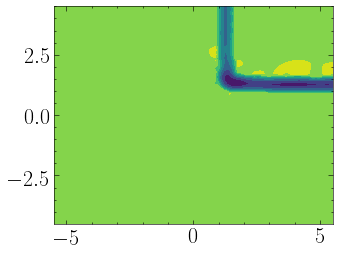

In [27]:
#integration on a non-periodic! domain
[Xp, Yp, FES_patch] = MFI.intgrad2(master_patch[-1][2], master_patch[-1][3], min_grid=np.array((np.min(X), np.min(Y))), max_grid=np.array((np.max(X), np.max(Y))))


plt.contourf(Xp,Yp,FES_patch)

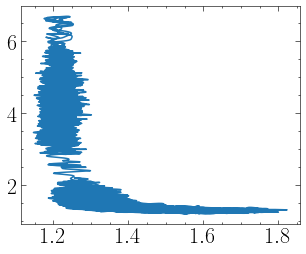

In [30]:
plt.plot(position_x,position_y)